In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movies=pd.read_csv("./src/datasets/movies.csv")
movies_links=pd.read_csv("./src/datasets/links.csv")

# Movies dataset:



In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.info() # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [5]:
movies.drop_duplicates() # no duplicates
len(movies.movieId.unique())

27278

**Create new column with year of the movie:**

In [6]:
movies["year"]=[y[-5:-1] for y in movies.title]
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [7]:
movies.year.value_counts()

2009    1105
2012     997
2013     997
2011     991
2008     971
        ... 
1903       1
978)       1
961)       1
 Nyr       1
985)       1
Name: year, Length: 192, dtype: int64

In [16]:
movies_drop=movies[movies.year.str.match('^(?![0,1,2,3,4,5,6,7,8,9])')].index
movies.drop(movies_drop, inplace=True)
movies.year=movies.year.str.replace(")","")
movies.year=movies.year.str.replace("次求","")
movies.year=movies.year.str.replace(" & ","")
movies.year=movies.year.str.replace("– ","")
movies.year=movies.year.str.replace("-","")

In [17]:
movies.year.value_counts()

2009    1105
2012     997
2013     997
2011     991
2008     971
        ... 
984        1
985        1
09         1
1903       1
1905       1
Name: year, Length: 172, dtype: int64

In [20]:
movies["year"]=movies["year"].astype("int")
movies["year"].dtypes

dtype('int64')

**Merge Dataframe with IDMB and ThemovieDB Links:**

In [21]:
movies_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [22]:
movies_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  27278 non-null  int64  
 1   imdbId   27278 non-null  int64  
 2   tmdbId   27026 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 639.5 KB


In [23]:
movies=pd.merge(movies,movies_links,on='movieId')
movies.head()

,movieId,title,genres,year,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,1995,113041,11862.0


In [24]:
movies.to_csv("./output/movies.csv")

# Genres Dataset:

**Create list with different genres and then create a new dataframe with genres columns:**

In [25]:
genre_list = ""
for index,row in movies.iterrows():
        genre_list += row.genres + "|"
        
genre_list_split = genre_list.split('|')
genre_list_split= list(set(genre_list_split)) # eliminate duplicates
genre_list_split.remove('') #remove blanks
print(len(genre_list_split))
genre_list_split

20


['Mystery',
 'Comedy',
 'Sci-Fi',
 'Children',
 'Western',
 'Animation',
 'Documentary',
 'Drama',
 'Horror',
 'Musical',
 'Fantasy',
 'Film-Noir',
 'Crime',
 'Thriller',
 'Romance',
 'War',
 '(no genres listed)',
 'Adventure',
 'Action',
 'IMAX']

In [26]:
movies["genres"]=movies["genres"].str.replace('|',";")

In [27]:
movies_genres=movies.copy()
for genre in genre_list_split:
    movies_genres[genre]=movies_genres.apply(lambda _:int(genre in _.genres), axis = 1)

In [28]:
movies_genres.head()

,movieId,title,genres,year,imdbId,tmdbId,Mystery,Comedy,Sci-Fi,Children,...,Fantasy,Film-Noir,Crime,Thriller,Romance,War,(no genres listed),Adventure,Action,IMAX
0,1,Toy Story (1995),Adventure;Animation;Children;Comedy;Fantasy,1995,114709,862.0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
1,2,Jumanji (1995),Adventure;Children;Fantasy,1995,113497,8844.0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,3,Grumpier Old Men (1995),Comedy;Romance,1995,113228,15602.0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy;Drama;Romance,1995,114885,31357.0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995,113041,11862.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
movies_genres.to_csv("./output/movies_genres.csv")

# Ratings Dataset:

In [30]:
ratings=pd.read_csv("./src/datasets/ratings.csv")

In [31]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [32]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1048575 non-null  int64  
 1   movieId    1048575 non-null  int64  
 2   rating     1048575 non-null  float64
 3   timestamp  1048575 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 32.0 MB


In [33]:
ratings.describe()

,userId,movieId,rating,timestamp
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.527086e+03,8.648988e+03,3.529272e+00,1.096036e+09
std,2.018424e+03,1.910014e+04,1.051919e+00,1.594899e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,8.254999e+08
25%,1.813000e+03,9.030000e+02,3.000000e+00,9.658382e+08
50%,3.540000e+03,2.143000e+03,4.000000e+00,1.099263e+09
75%,5.233000e+03,4.641000e+03,4.000000e+00,1.217407e+09
max,7.120000e+03,1.306420e+05,5.000000e+00,1.427764e+09


In [34]:
ratings.isnull().sum()#no null values

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [35]:
ratings["rating"].value_counts()

4.0    295135
3.0    226202
5.0    152562
3.5    112926
4.5     79848
2.0     74706
2.5     44791
1.0     35144
1.5     14029
0.5     13232
Name: rating, dtype: int64

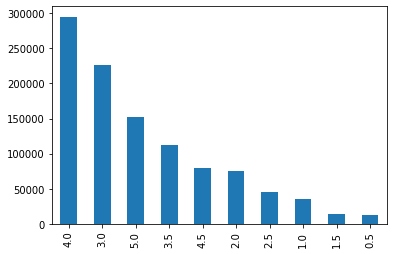

In [36]:
ratings["rating"].value_counts().plot.bar()

In [37]:
ratings.drop(columns="timestamp", inplace=True)
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


**Check if users have rated the same movie different times. In this case, we take the max rating:**

In [38]:
ratings_user=ratings.groupby(['userId','movieId']).aggregate(np.max)
len(ratings_user) # no duplicates ratings for the same user for an specific movie

1048575

**Count unique users:**

In [39]:
len(ratings['userId'].unique())

7120

**Percent of rating values:**

In [40]:
ratings_count = ratings.groupby('rating').count() # count num of users and movies with each rating
ratings_count

,userId,movieId
rating,,
0.5,13232,13232
1.0,35144,35144
1.5,14029,14029
2.0,74706,74706
2.5,44791,44791
3.0,226202,226202
3.5,112926,112926
4.0,295135,295135
4.5,79848,79848


In [41]:
ratings_count['total_percentage_rating']=round(ratings_count['userId']*100/ratings_count['userId'].sum(),1)
ratings_count

,userId,movieId,total_percentage_rating
rating,,,
0.5,13232,13232,1.3
1.0,35144,35144,3.4
1.5,14029,14029,1.3
2.0,74706,74706,7.1
2.5,44791,44791,4.3
3.0,226202,226202,21.6
3.5,112926,112926,10.8
4.0,295135,295135,28.1
4.5,79848,79848,7.6


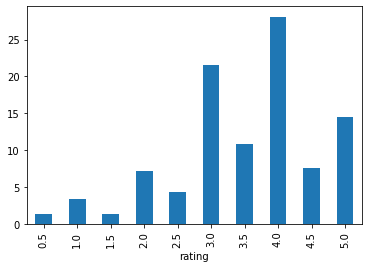

In [42]:
ratings_count['total_percentage_rating'].plot.bar()

**Find the number of ratings for each user and calculate the average rating for each user:**

In [43]:
user_rating_average = pd.DataFrame(ratings.groupby('userId')['rating'].agg(['count','mean']))
user_rating_average.head()

,count,mean
userId,,
1,175,3.742857
2,61,4.000000
3,187,4.122995
4,28,3.571429
5,66,4.272727


In [44]:
#ratings=pd.merge(ratings,user_rating_average,on="userId")
#usersreviews=ratings[(ratings["count"]<4000)].index
#ratings.drop(usersreviews,inplace=True)

In [45]:
#ratings.drop(columns=["count","mean"],inplace=True)

In [46]:
ratings.shape

(1048575, 3)

In [47]:
len(ratings['userId'].unique())

7120

In [48]:
ratings.to_csv("./output/ratings.csv")

**Find the number of ratings for each movie and calculate the average rating for movie:**

In [49]:
movie_rating_average = pd.DataFrame(ratings.groupby('movieId')['rating'].agg(['count','mean']))
movie_rating_average.head()

,count,mean
movieId,,
1,2569,3.959323
2,1155,3.268398
3,685,3.186861
4,138,3.000000
5,657,3.143836


### Calculate rating score based on the IDMB formula:

IMDB uses this famous formula:
weighted rank (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C

 where:
 
  R = average for the movie (mean) = (Rating)
  
  v = number of votes for the movie = (votes)
  
  m = minimum votes required to be listed in the Top 250 (currently 1250)
  
  C = the mean vote across the whole report (currently 6.8)
  
This formula is exceedingly useful, but I have beef with the "m" variable, because it's arbitrary. As far as I can tell, the other three variables should be enough to calculate what score a movie would have if it had a quadrillion votes.

**Find minimum votes required (number of ratings of percentile 70 of the movies):**

In [52]:
min_votes=np.percentile(movie_rating_average['count'],70) #It gives the no of ratings at least 70% of the movies have
min_votes

30.0

**Find the average of ratings:**

In [53]:
mean_vote=ratings['rating'].mean()
mean_vote

3.5292716305462175

**Select movies that have more than "min_votes" ratings:**

In [56]:
movies_rating = movie_rating_average.loc[movie_rating_average['count']>min_votes]
movies_rating.head()

,count,mean
movieId,,
1,2569,3.959323
2,1155,3.268398
3,685,3.186861
4,138,3.000000
5,657,3.143836


In [57]:
def weighted_rank(movie, m=min_votes, C=mean_vote):
    v = movie['count'] #number of votes for the movie 
    R = movie['mean'] #average for the movie (mean) = (Rating)
    return (v/(v+m) * R) + (m/(m+v) * C)

In [66]:
movies_rating['idmb_rank'] = movies_rating.apply(weighted_rank, axis=1)
movies_rating["movieId"]=movies_rating.index
ovies_rating=movies_rating.rename_axis("id_movie",inplace=True)
movies_rating.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,count,mean,idmb_rank,movieId
id_movie,,,,
1,2569,3.959323,3.954359,1
2,1155,3.268398,3.275003,2
3,685,3.186861,3.201228,3
4,138,3.000000,3.094513,4
5,657,3.143836,3.160667,5


In [68]:
movies_info=pd.merge(movies_genres,movies_rating,on='movieId')
movies_info.head()

,movieId,title,genres,year,imdbId,tmdbId,Mystery,Comedy,Sci-Fi,Children,...,Thriller,Romance,War,(no genres listed),Adventure,Action,IMAX,count,mean,idmb_rank
0,1,Toy Story (1995),Adventure;Animation;Children;Comedy;Fantasy,1995,114709,862.0,0,1,0,1,...,0,0,0,0,1,0,0,2569,3.959323,3.954359
1,2,Jumanji (1995),Adventure;Children;Fantasy,1995,113497,8844.0,0,0,0,1,...,0,0,0,0,1,0,0,1155,3.268398,3.275003
2,3,Grumpier Old Men (1995),Comedy;Romance,1995,113228,15602.0,0,1,0,0,...,0,1,0,0,0,0,0,685,3.186861,3.201228
3,4,Waiting to Exhale (1995),Comedy;Drama;Romance,1995,114885,31357.0,0,1,0,0,...,0,1,0,0,0,0,0,138,3.000000,3.094513
4,5,Father of the Bride Part II (1995),Comedy,1995,113041,11862.0,0,1,0,0,...,0,0,0,0,0,0,0,657,3.143836,3.160667


In [69]:
movies_info.to_csv("./output/allmovies.csv")